**HOMEWORK MATPLOTLIB BASIC - Adi Lukmanto**

Google menyediakan data pergerakan/perpindahan masyarakat di berbagai belahan dunia saat virus covid-19 melanda. Data pergerakan ini diperoleh dari GPS handphone masyarakat yang menggunakan layanan google maps. Berikut saya sediakan data aggregat harian dari google untuk wilayah Jakarta dengan nama `Global_Mobility_Report.csv`. Dengan menggunakan data itu, maka:

1.	Buat bar chart (diagram batang) yang menunjukkan data pergerakan harian pada area taman yang ditunjukkan pada kolom parks_percent_change_from_baseline.
Hints: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
2.	Buat Visualisasi menggunakan data tersebut, dan tunjukkan apa yang menurut kalian menarik. Kalian bebas mau memvisualisasikan menggunakan diagram apapun dan kolom apapun pada data tersebut.


In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tugas 19 - Global_Mobility_Report.csv", parse_dates=['date'], index_col= ['date'])

In [3]:
df.head()

,country_region,sub_region_1,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline
date,,,,
2020-02-15,Indonesia,Jakarta,2,16
2020-02-16,Indonesia,Jakarta,-10,-15
2020-02-17,Indonesia,Jakarta,-2,-6
2020-02-18,Indonesia,Jakarta,-1,-3
2020-02-19,Indonesia,Jakarta,-1,-2


In [4]:
df.tail()

,country_region,sub_region_1,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline
date,,,,
2020-08-07,Indonesia,Jakarta,-23,-61
2020-08-08,Indonesia,Jakarta,-27,-62
2020-08-09,Indonesia,Jakarta,-32,-66
2020-08-10,Indonesia,Jakarta,-25,-65
2020-08-11,Indonesia,Jakarta,-28,-68


In [5]:
df.dtypes

country_region                                        object
sub_region_1                                          object
retail_and_recreation_percent_change_from_baseline     int64
parks_percent_change_from_baseline                     int64
dtype: object

In [6]:
# buang kolom yang tidak digunakan
df.drop(['country_region', 'sub_region_1'], axis=1, inplace=True)

In [7]:
# mengganti nama kolom
df = df.rename(columns={"retail_and_recreation_percent_change_from_baseline":"ritel dan rekreasi","parks_percent_change_from_baseline":"taman"})

**Diagram Batang - untuk area taman**

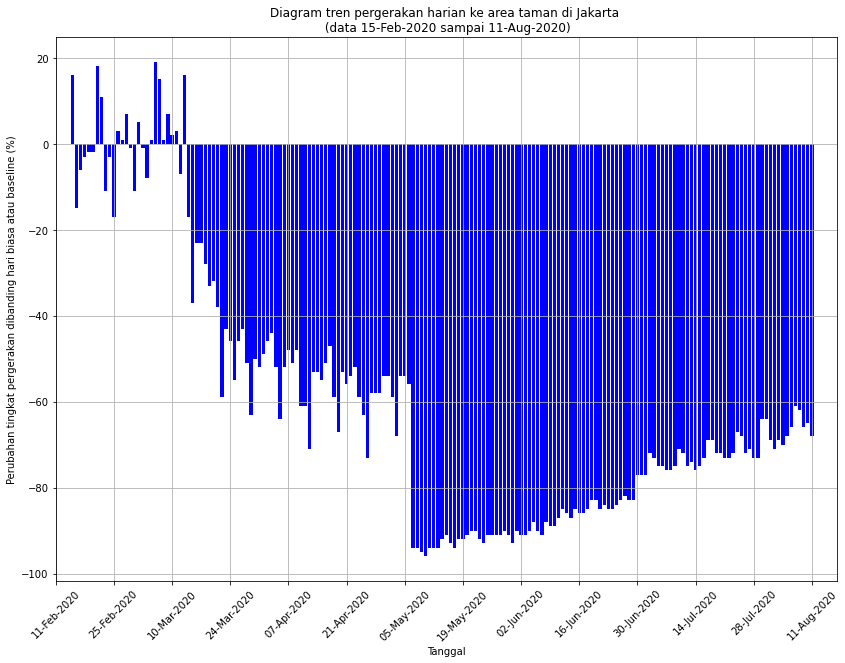

In [8]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(14, 10))

# Menentukan x-axis and y-axis
ax.bar(df.index.values,
       df['taman'],
       color='blue')

# Menentukan title, label axes, dan limit x-axis
ax.set(xlabel="Tanggal",
       ylabel="Perubahan tingkat pergerakan dibanding hari biasa atau baseline (%)",
       title="Diagram tren pergerakan harian ke area taman di Jakarta \n (data 15-Feb-2020 sampai 11-Aug-2020)",
       xlim=[pd.to_datetime('2020-02-11'), pd.to_datetime('2020-08-17')])

# Menentukan format tanggal
date_form = DateFormatter("%d-%b-%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

ax.grid(True)
plt.xticks(rotation=45)

plt.show()

**Diagram garis untuk area taman serta ritel dan rekreasi**

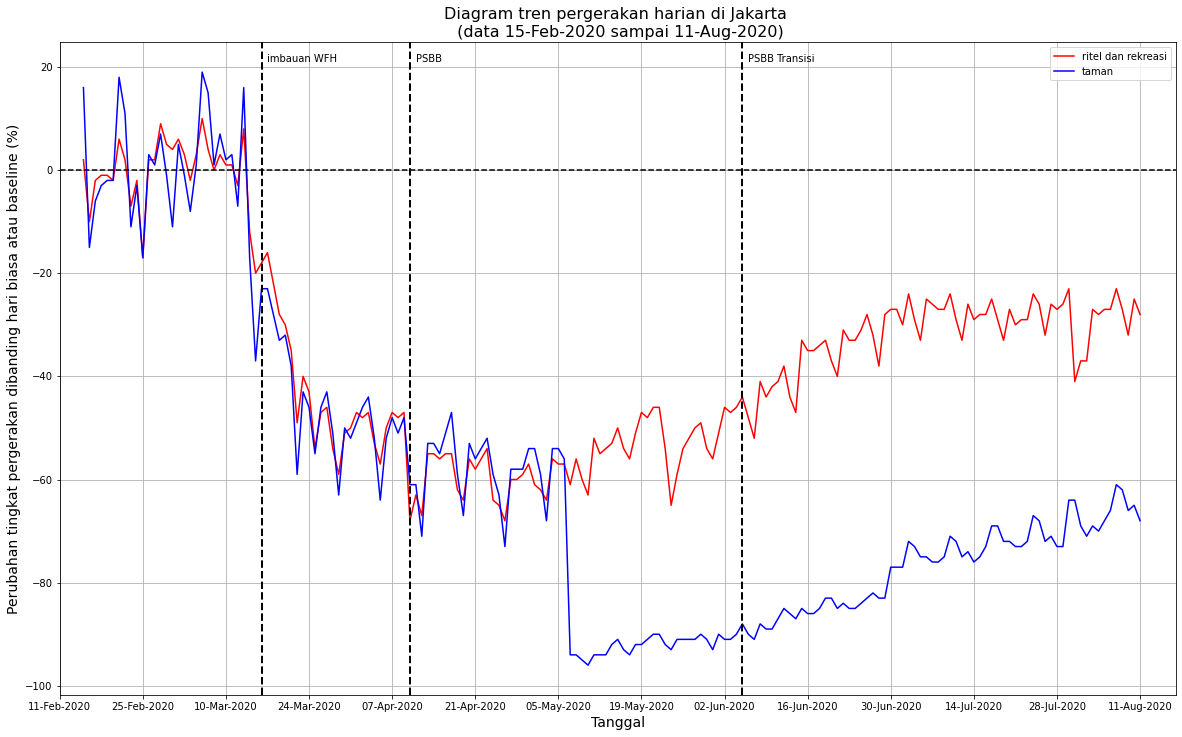

In [9]:
# Create figure dan plot space
fig, ax = plt.subplots(figsize=(20, 12))

# Menentukan plot x-axis and y-axis 
ax.plot(df.index.values, df['ritel dan rekreasi'], color='r')
ax.plot(df.index.values, df['taman'], color='b')

# Menentukan title dan label axes
plt.title('Diagram tren pergerakan harian di Jakarta \n (data 15-Feb-2020 sampai 11-Aug-2020)', size=16)
plt.xlabel('Tanggal', size=14)
plt.ylabel('Perubahan tingkat pergerakan dibanding hari biasa atau baseline (%)', size=14)

# membuat beberapa garis vertikal
xposition = [pd.to_datetime('2020-03-16'), pd.to_datetime('2020-04-10'), pd.to_datetime('2020-06-05')]
for xc in xposition:
    ax.axvline(x=xc, color='k', linestyle='--', lw=2)

# input label untuk garis vertikal    
ax.text(pd.to_datetime('2020-03-17'),21,'imbauan WFH')
ax.text(pd.to_datetime('2020-04-11'),21,'PSBB')
ax.text(pd.to_datetime('2020-06-06'),21,'PSBB Transisi')

# menambah garis horizontal y=0
ax.axhline(y=0,linestyle='--',color='k')

ax.grid(True)

# Menentukan legenda
column_names = list(df.columns)
ax.legend(column_names[:])

# Menentukan format tanggal
date_form = DateFormatter("%d-%b-%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.set_xlim(pd.to_datetime('2020-02-11'), pd.to_datetime('2020-08-17'))

plt.show()

Untuk memutus rantai penyebaran COVID-19, pemerintah menerapkan berbagai kebijakan yang ketat, termasuk PSBB/semi-lockdown; penutupan sekolah dan tempat kerja; pembatalan acara-acara dan pertemuan publik; serta pembatasan angkutan umum. 
Langkah-langkah ini diperlukan untuk memperlambat penyebaran virus dengan menerapkan jaga jarak/physical distancing.

Seberapa efektif kebijakan-kebijakan ini dalam mengurangi pergerakan manusia? Kita bisa mendapatkan beberapa masukan tentang ini dari data yang disajikan Google dalam COVID-19 Community Mobility Reports. Di dalam laporan itu, Google menyajikan data berupa tingkat pergerakan di sejumlah negara di dunia, termasuk Indonesia, lengkap dengan rincian daerah yang berada di negara tersebut. Di kelas data science ini, data yang diberikan hanya untuk perubahan tingkat pergerakan ke area taman serta ritel dan rekreasi di Jakarta saja.  


**Interpretasi data dan diagram**

1. Kita bisa melihat adanya penurunan tingkat pergerakan di Jakarta yang cukup besar dibandingkan hari biasa setelah muncul imbauan / kebijakan dari Presiden RI untuk melakukan physical distancing dan beraktivitas produktif di rumah (WFH) mulai 16 Maret 2020. Tren penurunan ini masih terus berlanjut semasa diberlakukannya PSBB (Pembatasan Sosial Berskala Besar) di Jakarta mulai 10 April 2020. Kebijakan PSBB membatasi pergerakan orang dan barang masuk dan keluar dari suatu daerah dan membatasi kegiatan yang dilakukan meliputi peliburan sekolah dan tempat kerja, pembatasan kegiatan keagamaan, dan/atau pembatasan kegiatan di tempat atau fasilitas umum.

2. Penurunan cukup besar pada pergerakan ke taman terlihat pada data 7 Mei 2020, di mana pada hari itu merupakan hari libur nasional (Hari Raya Waisak) dan merupakan masa menjelang Hari Raya Idulfitri. Pada masa yang sama, pergerakan ke kawasan ritel tidak turun dikarenakan untuk memenuhi kebutuhannya, warga Jakarta masih membeli dari ritel (restoran/rumah makan, kafe, dan pusat perbelanjaan), serta untuk berbelanja kebutuhan menjelang Hari Raya Idulfitri.

3. Tren pergerakan harian menunjukkan peningkatan seiring pemberlakuan PSBB yang diperlonggar (PSBB transisi) mulai 5 Juni 2020, dengan diizinkannya pembukaan kegiatan sosial ekonomi (taman, pusat perbelanjaan, dsb), yang masih berlaku hingga saat ini.

